Análise do conjunto de dados sobre sentimentos em redes sociais

Perguntas de negócio:

1. Quais são os 4 sentimentos mais comuns
2. Quais são as plataformas utilizadas e qual a quantidade de cada uma
3. Qual é o sentimento geral dos usuários nas diferentes plataformas sociais? Existe uma plataforma que tende a ter mais posts positivos ou negativos?
4. Quais tipos de conteúdo (identificados pelas hashtags) geram mais engajamento em termos de curtidas e retweets? Isso varia por país?
5. Existe uma correlação entre o horário (e possivelmente o dia) da postagem e o nível de engajamento que ela recebe? 
6. Como o engajamento (curtidas e retweets) varia entre as diferentes plataformas sociais para temas similares? Existe uma plataforma que se destaca para certos tipos de conteúdo?
7. Existem diferenças significativas no tipo de conteúdo compartilhado ou no sentimento das postagens entre diferentes países? Como isso pode refletir as preferências culturais ou os eventos locais?
8. Como o sentimento e o tipo de conteúdo compartilhado evoluem ao longo do tempo? Existem padrões sazonais ou tendências que podem ser identificados a partir dos dados disponíveis?
9. O sentimento expresso nas postagens tem alguma correlação com o nível de engajamento que elas recebem? Por exemplo, postagens positivas recebem mais curtidas ou retweets?
10. Quão eficazes são as hashtags em aumentar o engajamento com as postagens? Existem hashtags específicas que tendem a ter um desempenho melhor?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 1 ANÁLISE EXPLORATÓRIA

### 1.1 Carregando os dados

In [2]:
base = pd.read_csv('sentimentdataset.csv')
base.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### 1.2 Deletar colunas sem sentido

In [3]:
# Criar uma cópia do dataset 
df = base.copy()
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0', 'User', 'Timestamp'], axis=1)

In [4]:
df.head()

,Text,Sentiment,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### 1.3 Informação sobre o dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Platform   732 non-null    object 
 3   Hashtags   732 non-null    object 
 4   Retweets   732 non-null    float64
 5   Likes      732 non-null    float64
 6   Country    732 non-null    object 
 7   Year       732 non-null    int64  
 8   Month      732 non-null    int64  
 9   Day        732 non-null    int64  
 10  Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 63.0+ KB


### 1.4 Há valores nulos?

In [6]:
df.isna().sum()

Text         0
Sentiment    0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

## 2 Respostas às perguntas de negócio

#### 2.1 Quais são os 4 sentimentos mais comuns

In [7]:
sentiment_counts = df['Sentiment'].value_counts()

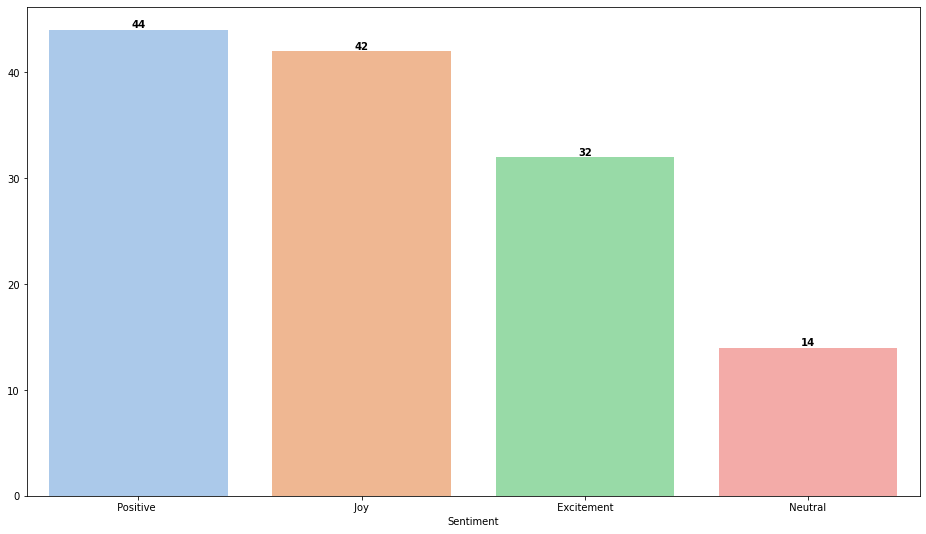

In [8]:
# 4 Sentimentos mais comuns
top_4 = sentiment_counts.nlargest(4)
plt.figure(figsize=(16, 9))
sns.barplot(x=top_4.index, y=top_4.values, palette='pastel')

# Adicione a quantidade de cada sentimento no gráfico
for i, v in enumerate(top_4.values):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
    
plt.show();

#### 2.2 Plataformas usadas e quantidade de conteúdo

In [9]:
# Contasr o número de ocorrências de cada plataforma
platform_counts = df.Platform.value_counts()

# Criar um Dataframe a partir do objeto de contagem
df_platform_counts = pd.DataFrame({
    'Platform': platform_counts.index,
    'Count': platform_counts.values
})

# Criar o gráfico de barras com Plotly (evidenciamos a quantidade com o mouse em cima de cada retângulo)
fig = px.bar(df_platform_counts, x='Platform', y='Count', title='Quantidade de cada Plataforma')
fig.show()


#### 2.3 Qual é o sentimento geral dos usuários nas diferentes plataformas sociais? Existe uma plataforma que tende a ter mais posts positivos ou negativos?

In [14]:
# visualizar os sentimentos 
unique_sentiment = df.Sentiment.unique()
print(unique_sentiment)

[' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' Helplessness    '
 ' 

In [17]:
# Categorizar os sentimentos
sentimentos_positivos = [
    'Positive', 'Happy', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration',
    'Affection', 'Awe', 'Excitement', 'Pride', 'Elation', 'Euphoria', 'Contentment',
    'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness',
    'Enthusiasm', 'Fulfillment', 'Reverence', 'Curiosity', 'Inspiration', 'Motivation',
    'Appreciation', 'Confidence', 'Optimism', 'Blessed', 'Overjoyed', 'Playful', 
    'Free-spirited', 'Inspired', 'Confident', 'Proud', 'Grateful', 'Empathetic', 
    'Compassionate', 'PlayfulJoy', 'Mindfulness', 'Wonder', 'JoyfulReunion', 'Satisfaction',
    'Anticipation', 'Reflection', 'Thrill', 'Creativity', 'Radiance', 'Rejuvenation',
    'Adventure', 'Freedom', 'InnerJourney', 'FestiveJoy', 'Celestial Wonder', 
    'Creative Inspiration', 'Ocean\'s Freedom', 'Runway Creativity', 'Relief'
]

sentimentos_negativos = [
    'Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Confusion',
    'Shame', 'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 
    'Boredom', 'Anxiety', 'Intimidation', 'Helplessness', 'Envy', 'Regret', 'Disgust',
    'Numbness', 'Bitterness', 'Fearful', 'Apprehensive', 'Overwhelmed', 'Jealous',
    'Devastated', 'Frustrated', 'Envious', 'Dismissive', 'Embarrassed', 'Mischievous',
    'Sad', 'Hate', 'Bad', 'Indifference'
]

sentimentos_neutros = [
    'Neutral', 'Curiosity', 'Indifference', 'Confusion', 'Numbness', 'Ambivalence', 
    'Acceptance', 'Determination', 'Serenity', 'Zest', 'Contentment', 'Hopeful', 
    'Pensive', 'Harmony', 'Mindfulness', 'Coziness', 'Melodic', 'Whimsy', 'Boredom', 
    'Indifference', 'Relief'
]

In [18]:
# Aplicar a categorização ao DataFrame

def categorizar_sentimento(sentimento):
    sentimento = sentimento.strip()  # Remove espaços em branco extras
    if sentimento in sentimentos_positivos:
        return 'Positivo'
    elif sentimento in sentimentos_negativos:
        return 'Negativo'
    elif sentimento in sentimentos_neutros:
        return 'Neutro'
    else:
        return 'Indefinido'  # Para sentimentos que não foram categorizados

# Aplicando a função de categorização ao DataFrame
df['Categoria_Sentimento'] = df['Sentiment'].apply(categorizar_sentimento)

# Verificando os resultados
print(df[['Sentiment', 'Categoria_Sentimento']].head())


     Sentiment Categoria_Sentimento
0   Positive               Positivo
1   Negative               Negativo
2   Positive               Positivo
3   Positive               Positivo
4   Neutral                  Neutro


In [19]:
# Contagem de sentimentos por plataforma
contagem_sentimentos = df.groupby(['Platform', 'Categoria_Sentimento']).size().unstack(fill_value=0)

# Exibir o resultado
print(contagem_sentimentos)

Categoria_Sentimento  Indefinido  Negativo  Neutro  Positivo
Platform                                                    
 Facebook                     40        52      17       122
 Instagram                    53        55      22       128
 Twitter                      25        28      10        65
 Twitter                      24        29      10        52


Analisar a Tendência de Sentimento por Plataforma

In [20]:
# Calcular porcentagens
porcentagens_sentimentos = contagem_sentimentos.div(contagem_sentimentos.sum(axis=1), axis=0 ) * 100

# Exibir o resultado
print(porcentagens_sentimentos)


Categoria_Sentimento  Indefinido   Negativo    Neutro   Positivo
Platform                                                        
 Facebook              17.316017  22.510823  7.359307  52.813853
 Instagram             20.542636  21.317829  8.527132  49.612403
 Twitter               19.531250  21.875000  7.812500  50.781250
 Twitter               20.869565  25.217391  8.695652  45.217391


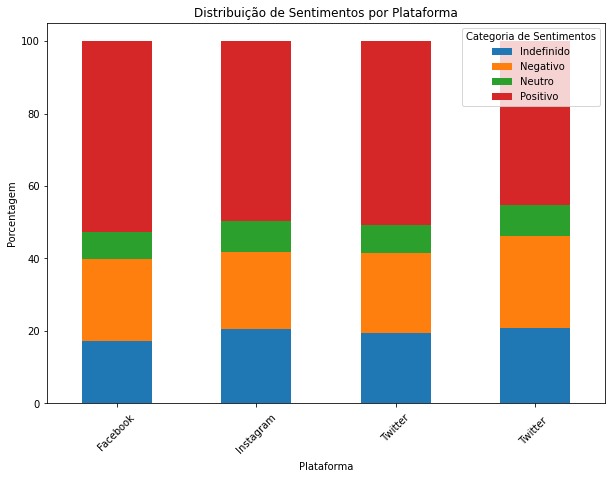

In [22]:
# Usando gráfico
porcentagens_sentimentos.plot(kind='bar', stacked=True, figsize=(10,7))

# Adicionar títulos e labels
plt.title('Distribuição de Sentimentos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Porcentagem')
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend(title='Categoria de Sentimentos')

# Mostra o gráfico
plt.show();

In [24]:
# Mesmo gráfico, mas com a biblioteca Plotly
import plotly.graph_objects as go

categorias = porcentagens_sentimentos.columns
platforms = porcentagens_sentimentos.index

# Cria uma lista de barras para o gráfico
barras = []
for categoria in categorias:
    barras.append(go.Bar(name=categoria, x=platforms, y=porcentagens_sentimentos[categoria]))
    
# Cria a figura com todas as barras
fig = go.Figure(data=barras)

# Fazer as barras empilhadas
fig.update_layout(barmode='stack', xaxis={'categoryorder': 'total descending'}, title='Distribuição de Sentimentos por Plataforma',
                xaxis_title='Plataforma',
                yaxis_title='Porcentagem',
                legend_title='Categoria de Sentimento'
                )

# Ajustar os ângulos dos textos do eixo X
fig.update_xaxes(tickangle=45)

# Mostra o gráfico
fig.show();

#### 2.4 Quais tipos de conteúdo (identificados pelas hashtags) geram mais engajamento em termos de curtidas e retweets? Isso varia por país?

In [25]:
# Cálculo do engajamento
df['Engajamento'] = df.Likes + df.Retweets

#  Explodir o DataFrame se as hashtags estiverem em uma lista, para ter uma linha por hashtag
df_explodido = df.explode('Hashtags')

# Agrupar por 'Hashtags' e 'Country', somando o engajamento
engajamento_por_hashtag_e_pais = df_explodido.groupby(['Hashtags', 'Country'])['Engajamento'].sum().reset_index() 

# Ordenar os resultados para encontrar as hashtags com mais engajamento
engajamento_ordenado = engajamento_por_hashtag_e_pais.sort_values(by='Engajamento', ascending=False)

# Exibir os resultados
print(engajamento_ordenado.head(10))

                                       Hashtags            Country  \
696    #Wonder #StargazingAdventure               South Africa       
542                 #Playful #CarnivalEscapade          Australia    
376   #Harmony #MusicalUnity                      Sweden             
559                       #Proud #ScalingPeaks                USA    
136             #Compassionate #TearsOfEmpathy             Canada    
163     #Coziness #WarmWinterEvening              Switzerland        
411    #Inspiration #ForestWhispers               Portugal           
677                 #TimelessTunes #SeniorJazz                 USA   
544         #Playful #JugglingResponsibilities                USA    
561    #Radiance #SpringBlooms                    Netherlands        

     Engajamento  
696        240.0  
542        216.0  
376        210.0  
559        207.0  
136        189.0  
163        180.0  
411        166.0  
677        150.0  
544        150.0  
561        150.0  


In [26]:
# Ordenar os resultados por 'Engajamento' de forma descendente e depois por 'Country'
engajamento_ordenado = engajamento_ordenado.sort_values(by=['Engajamento', 'Country'], ascending=[False, True])

# Formatando a coluna 'Engajamento' para exibir no máximo duas casas decimais
engajamento_ordenado['Engajamento'] = engajamento_ordenado['Engajamento'].map('{:.2f}'.format)

# Exibir a tabela ordenada e formatada
engajamento_ordenado


,Hashtags,Country,Engajamento
696,#Wonder #StargazingAdventure,South Africa,240.00
542,#Playful #CarnivalEscapade,Australia,216.00
376,#Harmony #MusicalUnity,Sweden,210.00
559,#Proud #ScalingPeaks,USA,207.00
136,#Compassionate #TearsOfEmpathy,Canada,189.00
...,...,...,...
402,#Indifference #DigitalOverload,Canada,22.00
230,#Disgust #Injustice,India,22.00
227,#Disgust #Corruption,UK,22.00
679,#Traffic #Morning,Canada,15.00


Resposta à pergunta: 

Os conteúdos que mais geram engajamento (acima de 200) são: #Wonder #StargazingAdventure, #Playful #CarnivalEscapade, #Harmony #MusicalUnity e #Proud #ScalingPeaks

O engajamento do conteúdo varia conforme o país.

#### 2.5 Existe uma correlação entre o horário (e possivelmente o dia) da postagem e o nível de engajamento que ela recebe? 

Passo 1: agrupamento dos dados por horário e tema

In [29]:
# Agrupar por 'Hora' e calcular a média de engajamento
engajamento_por_hora = df.groupby('Hour')['Engajamento'].mean().reset_index()

# Agrupar por 'Hora' e 'Hashtags' para análise temática
df_explodido = df.explode('Hashtags')
engajamento_por_hora_e_tema = df_explodido.groupby(['Hour', 'Hashtags'])['Engajamento'].mean().reset_index()

Passo 2: Coeficiente de correlação

In [30]:
# Análise de correlação (exemplo genérico)
coeficiente_de_correlacao = engajamento_por_hora.corr()
coeficiente_de_correlacao

,Hour,Engajamento
Hour,1.000000,0.600787
Engajamento,0.600787,1.000000


Passo 3: Plotar gráfico

In [35]:
# Agrupar por 'DayOfWeek' e 'Hour' e calcular a média de engajamento
engagement_by_day_hour = df.groupby(['Day', 'Hour'])['Engajamento'].mean().reset_index()

# Criar o heatmap
fig = px.density_heatmap(engagement_by_day_hour, x='Hour', y='Day', z='Engajamento', color_continuous_scale='Viridis')

# Adicionar títulos
fig.update_layout(title='Engajamento Médio por dia da semana e hora', xaxis_title='Hora do dia', yaxis_title='Dia da semana')

# Plota o gráfico
fig.show()

#### 2.6 Como o engajamento (curtidas e retweets) varia entre as diferentes plataformas sociais para temas similares? Existe uma plataforma que se destaca para certos tipos de conteúdo?

Passo 1: agrupamento por temas e plataformas

In [36]:
aggregated_data = df.groupby(['Platform', 'Hashtags'])['Engajamento'].mean().reset_index()
aggregated_data

,Platform,Hashtags,Engajamento
0,Facebook,#AI #TechConference,75.0
1,Facebook,#AcademicFrustration #HighSchoolStress,57.0
2,Facebook,#Acceptance #Challenges,45.0
3,Facebook,#Acceptance #LifeJourney,45.0
4,Facebook,#Acceptance #SelfLoveJourney,45.0
...,...,...,...
698,Twitter,#Tenderness #PetLove,75.0
699,Twitter,#Traffic #Morning,15.0
700,Twitter,#VRMeetup #VirtualReality,83.0
701,Twitter,#WinterSports #Fun,45.0


Passo 2: Visualização com Plotly

In [39]:
fig = px.bar(aggregated_data, x='Hashtags', y='Engajamento', color='Platform', barmode='group',
             title='Engajamento por Tema e Plataforma',
             labels={'Hashtags': 'Temas', 'Engajamento': 'Engajamento Médio'})

fig.update_layout(xaxis_title='Temas', yaxis_title='Engajamento Médio', xaxis={'categoryorder': 'total descending'})
fig.show()

#### 2.7 Existem diferenças significativas no tipo de conteúdo compartilhado ou no sentimento das postagens entre diferentes países? Como isso pode refletir as preferências culturais ou os eventos locais?

Passo 1: Analisar o número de postagens por hashtage em cada país

In [41]:
hashtags_by_country = df.groupby(['Country', 'Hashtags']).size().unstack(fill_value=0)

Passo 2: Analisar o sentimento das postagens por país

In [42]:
sentiment_analysis = df.groupby(['Country', 'Sentiment']).size().unstack(fill_value=0)

In [43]:
print("Número de Postagens por Hashtag e País:")
print(hashtags_by_country)
print("\nAnálise de Sentimento por País:")
print(sentiment_analysis)

Número de Postagens por Hashtag e País:
Hashtags              #AI #TechConference                       \
Country                                                          
 Australia                                                   0   
 Australia                                                   0   
 Australia                                                   0   
 Australia                                                   0   
 Australia                                                   0   
...                                                        ...   
 USA                                                         0   
 USA                                                         0   
 USA                                                         0   
 USA                                                         0   
USA                                                          1   

Hashtags              #AcademicFrustration #HighSchoolStress   \
Country                             

Passo 3: Visualização dos resultados

In [44]:
# Gráfico do número de postagens por hashtag em cada país
df_melted = df.groupby(['Country', 'Hashtags']).size().reset_index(name='Posts')
fig = px.bar(df_melted, x='Country', y='Posts', color='Hashtags', title='Número de Postagens por Hashtag e País')
fig.show()

# Gráfico de análise de sentimento por país
sentiment_melted = sentiment_analysis.reset_index().melt(id_vars='Country', var_name='Sentiment', value_name='Posts')
fig_sentiment = px.bar(sentiment_melted, x='Country', y='Posts', color='Sentiment', title='Análise de Sentimento por País')
fig_sentiment.show()

#### 2.8 Como o sentimento e o tipo de conteúdo compartilhado evoluem ao longo do tempo? Existem padrões sazonais ou tendências que podem ser identificados a partir dos dados disponíveis?

Passo 1: Agrupamento dos dados por ano, mês e sentimento e contando o número de postagens

In [47]:
sentiment_distribution = df.groupby(['Year', 'Month', 'Sentiment']).size().reset_index(name='Count')

Passo 2: Preparar os dados para plotagem

In [48]:
unique_years = sentiment_distribution['Year'].unique()

Passo 3: Criar a figura para os gráficos

In [49]:
fig = go.Figure()

# Adicionar um gráfico para cada tipo de sentimento
for sentiment in df['Sentiment'].unique():
    for year in unique_years:
        sentiment_data = sentiment_distribution[(sentiment_distribution['Sentiment'] == sentiment) & (sentiment_distribution['Year'] == year)]
        if not sentiment_data.empty:
            fig.add_trace(go.Scatter(x=sentiment_data['Month'], y=sentiment_data['Count'],
                                     mode='lines+markers',
                                     name=f'{sentiment} {year}'))

# Atualizar layout do gráfico
fig.update_layout(title='Evolução do Sentimento ao Longo do Tempo',
                  xaxis_title='Mês',
                  yaxis_title='Número de Postagens',
                  xaxis=dict(tickmode='linear'))

fig.show()

Análise da Popularidade de Hashtags ao Longo do Tempo

In [50]:
from collections import Counter

# Extrair hashtags e criar uma série com todas as hashtags
all_hashtags = pd.Series([hashtag for sublist in df['Hashtags'].str.split() for hashtag in sublist])

# Contar as ocorrências de cada hashtag
hashtags_count = all_hashtags.value_counts()

# Plotar as top N hashtags mais populares
top_n = 10
fig = px.bar(x=hashtags_count.index[:top_n], y=hashtags_count.values[:top_n], 
             title=f'Top {top_n} Hashtags Mais Populares',
             labels={'x': 'Hashtags', 'y': 'Número de Ocorrências'})
fig.show()


#### 2.9 O sentimento expresso nas postagens tem alguma correlação com o nível de engajamento que elas recebem? Por exemplo, postagens positivas recebem mais curtidas ou retweets?

Passo 1: Preparar os Dados

In [51]:
df['Engajamento'] = df['Likes'] + df['Retweets']

Passo 2: Agrupamento por Sentimento

In [52]:
engajamento_medio_por_sentimento = df.groupby(['Sentiment'])['Engajamento'].mean().reset_index()

In [69]:
sentiment_score_mapping = {
    'Positivo': 1,
    'Negativo': -1,
    'Neutro': 0,
    'Indefinido': None  # Pode escolher descartar ou tratar de outra maneira
}

# Aplicar o mapeamento para criar uma nova coluna de pontuação de sentimento
df['SentimentScore'] = df['Categoria_Sentimento'].map(sentiment_score_mapping)

Passo 3: Análise de Correlação

In [70]:
correlation = df[['SentimentScore', 'Engajamento']].corr()
print(correlation)

                SentimentScore  Engajamento
SentimentScore        1.000000     0.410874
Engajamento           0.410874     1.000000


A correlação positiva moderada (0.41) entre SentimentScore e Engajamento sugere que há uma tendência de postagens com sentimentos positivos a receberem mais engajamento em comparação com postagens neutras ou negativas. 

No entanto, é importante notar que a correlação não é extremamente alta, indicando que outros fatores além do sentimento também influenciam o nível de engajamento das postagens.

Passo 4: Visualização

In [53]:
# Criar gráfico de barras para visualizar a média de engajamento por sentimento
fig = px.bar(engajamento_medio_por_sentimento, x='Sentiment', y='Engajamento',
             title='Média de Engajamento por Sentimento',
             labels={'Sentiment': 'Sentimento', 'Engajamento': 'Engajamento Médio'})

fig.show()

#### 2.10 Quão eficazes são as hashtags em aumentar o engajamento com as postagens? Existem hashtags específicas que tendem a ter um desempenho melhor?

Passo 1: Preparação dos dados

In [71]:
# Dividir as hashtags em listar individuais
df['HashtagsList'] = df['Hashtags'].str.split()

Passo 2: Análise do Engajamento por Presença de Hashtags

In [72]:
# Verificando o engajamento médio com e sem hashtags
df['HasHashtag'] = df['HashtagsList'].apply(lambda x: False if x is None or len(x) == 0 else True)
engajamento_com_hashtag = df[df['HasHashtag']]['Engajamento'].mean()
engajamento_sem_hashtag = df[~df['HasHashtag']]['Engajamento'].mean()

print(f"Engajamento médio com hashtags: {engajamento_com_hashtag}")
print(f"Engajamento médio sem hashtags: {engajamento_sem_hashtag}")

Engajamento médio com hashtags: 64.40983606557377
Engajamento médio sem hashtags: nan


Passo 3: Identificar Hashtags de Alto Desempenho

In [73]:
# Extrair todas as hashtags em uma lista única para todas as postagens
all_hashtags = [hashtag for sublist in df['HashtagsList'].dropna() for hashtag in sublist]

# Calcular o engajamento médio por hashtag
engajamento_por_hashtag = (df.explode('HashtagsList')
                              .groupby('HashtagsList')['Engajamento']
                              .mean()
                              .sort_values(ascending=False))

print(engajamento_por_hashtag.head(10))  # Top 10 hashtags com maior engajamento médio


HashtagsList
#Motivation              120.0
#AdeleConcert            120.0
#StargazingAdventure     120.0
#MoviePremiereThrills    120.0
#EndlessSmiles           120.0
#JustinBieber            120.0
#SimpleMoments           120.0
#AdventureAwaits         120.0
#Mesmerizing             120.0
#SunsetBeauty            120.0
Name: Engajamento, dtype: float64


In [77]:
print(engajamento_por_hashtag.tail(10))

HashtagsList
#Helplessness       23.000000
#Boredom            22.333333
#SickDay            22.000000
#DigitalOverload    22.000000
#Monotony           22.000000
#Health             22.000000
#Stagnation         22.000000
#Morning            15.000000
#Struggle           15.000000
#Traffic            15.000000
Name: Engajamento, dtype: float64


Passo 4: Visualização dos Resultados

In [76]:
fig = px.bar(engajamento_por_hashtag.head(10).reset_index(), 
             x='HashtagsList', y='Engajamento', 
             title='Top 10 Hashtags por Engajamento Médio',
             labels={'HashtagsList': 'Hashtags', 'Engajamento': 'Engajamento Médio'})
fig.show()